In [7]:
!pip install --upgrade explainerdashboard

 92%|==================  | 15239/16605 [00:11<00:00]       

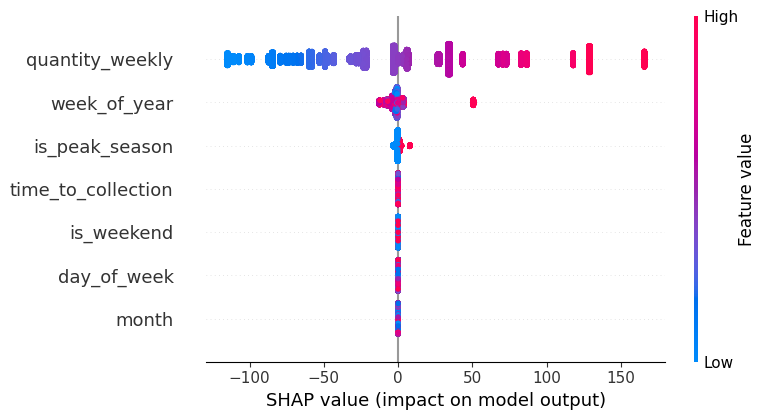

<Figure size 800x500 with 0 Axes>

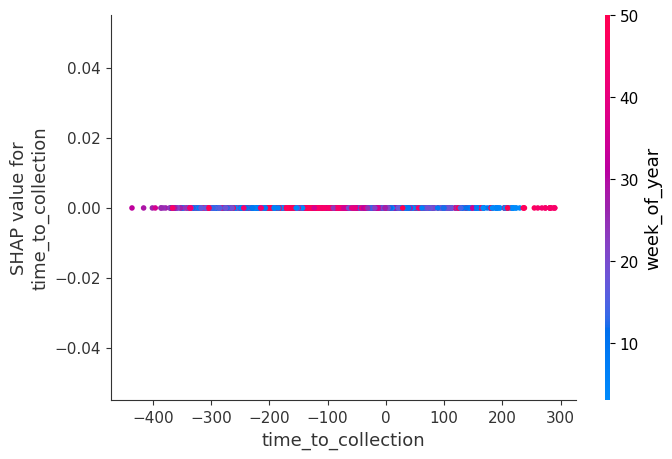

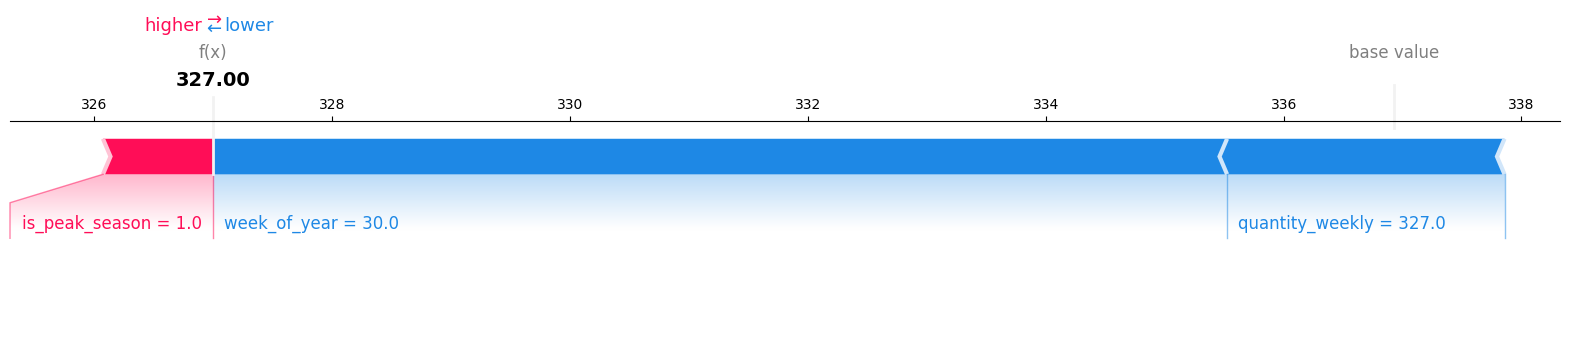

SHAP Analysis Completed. Check generated plots.
Top 3 Selected Features:
           feature  importance
6  quantity_weekly   60.881417
0     week_of_year    4.756634
5   is_peak_season    0.967981


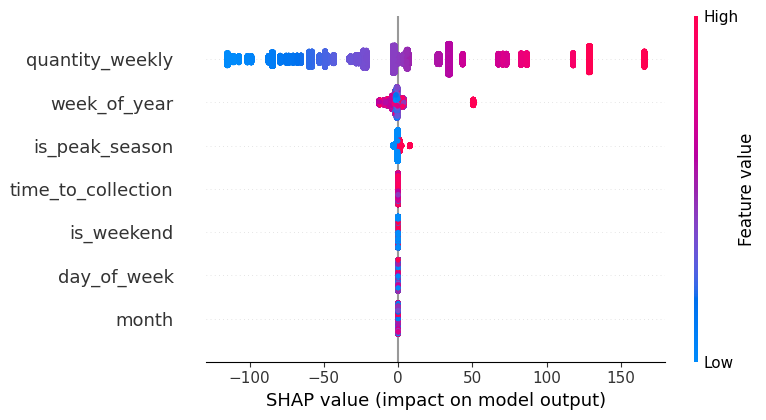

In [23]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Load dataset
df = pd.read_csv('/content/FAuto.cleanedFood Hampers Fact_CMPT3835.csv')

# Convert timestamp column to datetime
df['collect_scheduled_date'] = pd.to_datetime(df['collect_scheduled_date'])

# Select features and target
feature_columns = ['week_of_year', 'month', 'day_of_week', 'is_weekend',
                   'time_to_collection', 'is_peak_season', 'quantity_weekly']
target_column = 'quantity'

X = df[feature_columns]
y = df[target_column]

# Load trained XGBoost model (replace with actual model path if needed)
model = xgb.XGBRegressor()
model.fit(X, y)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Summary plot (Global Importance)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X)
plt.show()

# Dependence plot (Example: 'time_to_collection')
plt.figure(figsize=(8, 5))
shap.dependence_plot('time_to_collection', shap_values.values, X)
plt.show()

# Force plot for a single prediction (first row example)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X.iloc[0, :], matplotlib=True)

# Save SHAP summary as an image
shap.summary_plot(shap_values, X, show=False)
plt.savefig("shap_summary.png")

importance_df = pd.DataFrame({'feature': X.columns, 'importance': np.abs(shap_values.values).mean(axis=0)})
importance_df = importance_df.sort_values(by="importance", ascending=False)

print("SHAP Analysis Completed. Check generated plots.")

print("Top 3 Selected Features:")
print(importance_df.head(3))



In [22]:
import pandas as pd
import xgboost as xgb
from explainerdashboard import RegressionExplainer, ExplainerDashboard # Import RegressionExplainer
import dash_bootstrap_components as dbc

# Load dataset
df = pd.read_csv('/content/FAuto.cleanedFood Hampers Fact_CMPT3835.csv')

# Convert collect_scheduled_date column to datetime
df['collect_scheduled_date'] = pd.to_datetime(df['collect_scheduled_date'])

# Select features and target
feature_columns = ['week_of_year', 'month', 'day_of_week', 'is_weekend',
                   'time_to_collection', 'is_peak_season', 'quantity_weekly']
target_column = 'quantity'

X = df[feature_columns]
y = df[target_column]

# Train or load an existing model
model = xgb.XGBRegressor()
model.fit(X, y)

# Create Explainer object
explainer = RegressionExplainer(model, X, y) # Use RegressionExplainer

# Launch interactive dashboard
ExplainerDashboard(explainer, title="Food Demand Prediction Dashboard").run()

Changing class type to XGBRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...


/usr/local/lib/python3.11/dist-packages/dash/dash.py:582: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.


TypeError: The `dash_bootstrap_components.DropdownMenu` component (version 2.0.0) received an unexpected keyword argument: `right`
Allowed arguments: align_end, caret, children, className, class_name, color, direction, disabled, group, id, in_navbar, key, label, menu_variant, nav, size, style, toggleClassName, toggle_class_name, toggle_style